In [1]:
import subprocess as sp
from typing import List

import openmm.unit as openmm_unit
import parmed
from openff.toolkit.topology import Molecule
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

from fragmenter import CyclodextrinFragmenter

LICENSE: Could not open license file "oe_license.txt" in local directory
LICENSE: N.B. OE_LICENSE environment variable is not set
LICENSE: N.B. OE_DIR environment variable is not set
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!


In [2]:
IPythonConsole.molSize = (400, 400)
IPythonConsole.ipython_useSVG = True

## Cyclodextrin Dimer Molecule

In [12]:
folder = "dimer"

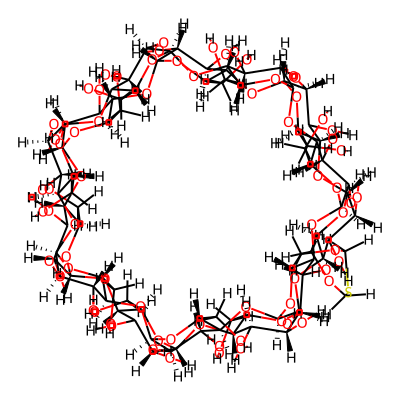

In [3]:
input_mol = Chem.MolFromMol2File(f"{dimer}/bcd-dimer-thiol.mol2", removeHs=False)
input_mol

## Glucose Monomer

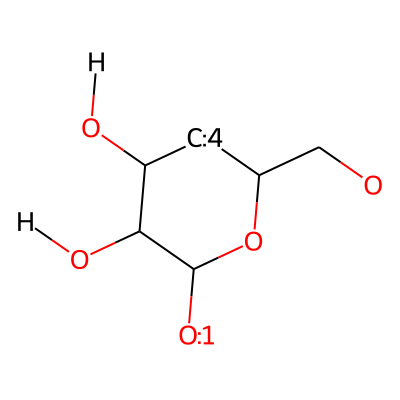

In [4]:
fragment_pure = "[#6]1(-[#8:1])-[#6](-[#8]-[#1])-[#6](-[#8]-[#1])-[#6$([#6]-[#8]):4]-[#6](-[#6]-[#8])-[#8]-1"
# fragment_pure = "[#6]1(-[#8])-[#6](-[#8]-[#1])-[#6](-[#8]-[#1])-[#6$([#6]-[#8])]-[#6](-[#6]-[#8]-[#1])-[#8]-1"

glucose_monomer = Chem.MolFromSmarts(fragment_pure)
glucose_monomer

## Thiol linker

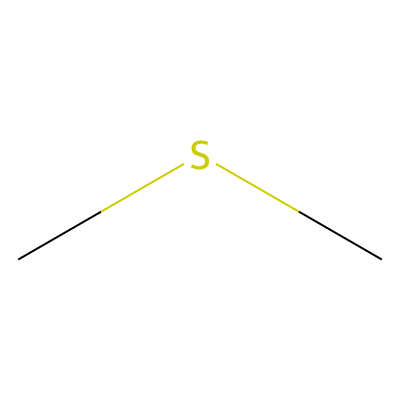

In [5]:
fragment_thiol = "[#6]-[#16]-[#6]"

thiol = Chem.MolFromSmarts(fragment_thiol)
thiol

## Create dimer linker

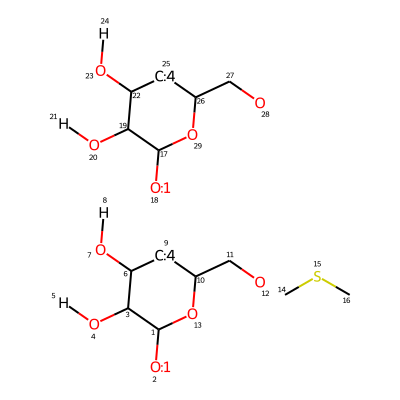

In [6]:
# Combine all three components
combined = Chem.CombineMols(Chem.CombineMols(glucose_monomer, thiol), glucose_monomer)

# Add labels on atoms
for i, atom in enumerate(combined.GetAtoms()):
    atom.SetProp("atomNote", str(atom.GetIdx() + 1))

combined

In [7]:
# Get atomic indices of interface atoms
oxygen_1 = None
carbon_thiol_1 = None
carbon_thiol_2 = None
for i, atom in enumerate(combined.GetAtoms()):
    index = int(atom.GetProp("atomNote")) + 1
    if index == 12:
        oxygen_1 = index - 1
    elif index == 14:
        carbon_thiol_1 = index - 1
    elif index == 16:
        oxygen_2 = index - 1
    elif index == 28:
        carbon_thiol_2 = index - 1

# Make molecule editable
edcombo = Chem.EditableMol(combined)

# Add bonds between the three components
edcombo.AddBond(oxygen_1, carbon_thiol_1, order=Chem.BondType.SINGLE)
edcombo.AddBond(oxygen_2, carbon_thiol_2, order=Chem.BondType.SINGLE)

30

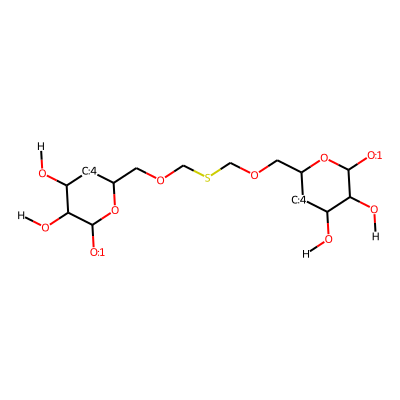

In [8]:
# Transfer Editable back to Chem.Mol
dimer_linker = edcombo.GetMol()
for i, atom in enumerate(dimer_linker.GetAtoms()):
    atom.ClearProp("atomNote")

dimer_linker

## Assign Partial Charges

In [9]:
# Create an instance of the fragmenter
cyclodextrin = CyclodextrinFragmenter(input_mol)
cyclodextrin.add_monomer(glucose_monomer)
cyclodextrin.add_monomer(dimer_linker)

In [10]:
# Assign AM1-BCC partial charges
cyclodextrin.assign_partial_charges(partial_charge_method="am1bcc")

In [11]:
# Save molecule with partial charges to file
cyclodextrin.to_file(f"{dimer}/bcd-dimer-thiol.am1bcc.sdf", file_format="SDF")
cyclodextrin.to_file(f"{dimer}/bcd-dimer-thiol.am1bcc.mol2", file_format="MOL2")
cyclodextrin.to_file(f"{dimer}/bcd-dimer-thiol.am1bcc.pdb", file_format="PDB")